In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import seaborn as sns
import athena_read as ar
import BinWindUtils as bw
from scipy.optimize import root


%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16


root_dir_morgan = "/Users/morganmacleod/DATA/athenaruns/binary-wind/"

In [15]:
st = ascii.read("simtable_v_r5_p4.dat")

# Wind Morphology

/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi1.0/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
('retrieving data with level =', 1, ' within in limit=', 48)
('slicing at ', 'z', '=', -0.09375)
('data has shape', (1, 512, 512))
/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi1.4/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
('retrieving data with level =', 1, ' within in limit=', 48)
('slicing at ', 'z', '=', -0.09375)
('data has shape', (1, 512, 512))


KeyboardInterrupt: 

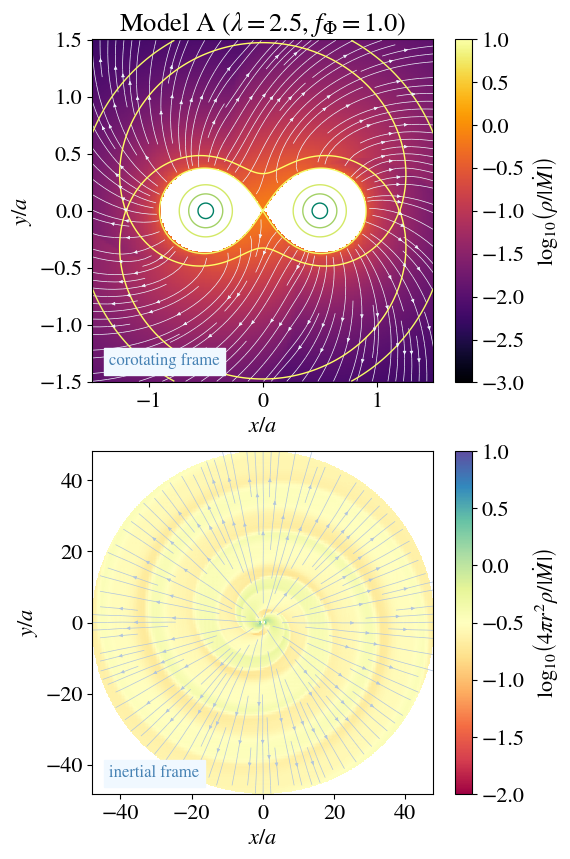

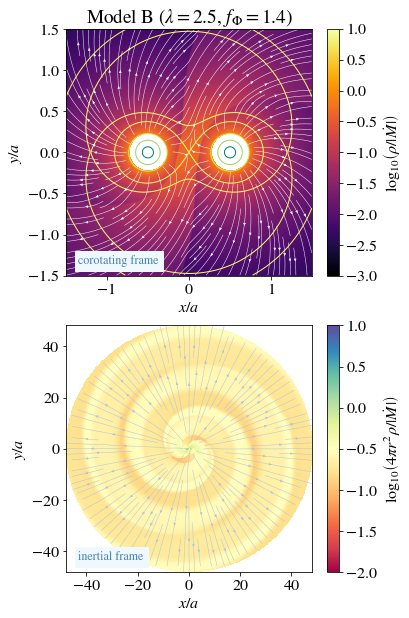

In [16]:
st = ascii.read("simtable_v_r5_p4.dat")
rmax = [48,48,48,48, 48,48,48,48, 35,28,23,20]


for i,my_dir in enumerate(st['dir']):
    if(st['fphi'][i]!=4.0):
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00011.athdf"
    else:
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00010.athdf"
    print(fn)
    
    
    plt.figure(figsize=(5.5,10))


    # Zoom panel 

    ## Read
    d = bw.read_data(fn,level=None,get_slice=True,slice_dir='z',slice_val=0,lim=1.5)
    fphi=st['fphi'][i]
    #d['EJ'] = 0.5*(d['vel1']**2 + d['vel2']**2 + d['vel3']**2) + d['PhiEff']
    d['r'] = np.sqrt(d['x']**2 + d['y']**2 + d['z']**2)
    cond = ((d['PhiEff']<-2*fphi) & (d['r']<1.2)) | (d['r'] > rmax[i])

    # Make plot
    plt.subplot(211)

    subsample = 1

    plt.pcolormesh(d['x'][0,::subsample,::subsample],
                   d['y'][0,::subsample,::subsample], 
                   np.log10(np.ma.masked_where(cond,d['rho']/-st['mdot'][i])[0,::subsample,::subsample] ),rasterized=True,
                   cmap='inferno',
                   vmax=1,vmin=-3)
    plt.colorbar(label=r"$\log_{10}\left(\rho/|\dot M| \right)$")

    skip = subsample*1
    plt.streamplot( d['x'][0,::skip,::skip],
                    d['y'][0,::skip,::skip],
                    np.ma.masked_where(cond,d['vel1'])[0,::skip,::skip],
                    np.ma.masked_where(cond,d['vel2'])[0,::skip,::skip],
                density=1.5,
                linewidth=0.5,arrowsize=0.5,
                color='AliceBlue')

    plt.contour(d['x'][0,::subsample,::subsample],
                d['y'][0,::subsample,::subsample],
                d['PhiEff'][0,::subsample,::subsample],
                levels = [-2*4,-2*2,-2*np.sqrt(2),-2,-2*0.86424],
                linewidths=1,
                cmap='summer'
               )

    plt.annotate('corotating frame',(0.05,0.05),xycoords='axes fraction',fontsize=12,
                 backgroundcolor='AliceBlue',color='SteelBlue')

    plt.title("Model "+st['model'][i]+r" $(\lambda=$"+str(st['lambda'][i])+r", $f_\Phi=$"+str(np.round(st['fphi'][i],1))+")" )

    plt.axis('equal')
    plt.xlabel(r'$x/a$')
    plt.ylabel(r'$y/a$')


    ### Wide panel

    ## Read
    d = bw.read_data(fn,level=1,get_slice=True,slice_dir='z',slice_val=0,lim=48)
    fphi=st['fphi'][i]
    #d['EJ'] = 0.5*(d['vel1']**2 + d['vel2']**2 + d['vel3']**2) + d['PhiEff']
    d['r'] = np.sqrt(d['x']**2 + d['y']**2 + d['z']**2)
    cond = ((d['PhiEff']<-2*fphi) & (d['r']<1.2)) | (d['r'] > rmax[i])

    # Make plot
    plt.subplot(212)

    subsample = 1

    plt.pcolormesh(d['x'][0,::subsample,::subsample],
                   d['y'][0,::subsample,::subsample], 
                   np.log10(np.ma.masked_where(cond,4*np.pi*(d['x']**2 + d['y']**2 + d['z']**2)*d['rho']/-st['mdot'][i])[0,::subsample,::subsample] ),rasterized=True,
                   cmap='Spectral',
                   vmax=1,vmin=-2)
    plt.colorbar(label=r"$\log_{10}\left(4\pi r^2 \rho/|\dot M| \right)$")

    skip = subsample*1
    plt.streamplot( d['x'][0,::skip,::skip],
                    d['y'][0,::skip,::skip],
                    np.ma.masked_where(cond,d['vx'])[0,::skip,::skip],
                    np.ma.masked_where(cond,d['vy'])[0,::skip,::skip],
                density=1.5,
                linewidth=0.5,arrowsize=0.5,
                color='LightSteelBlue')

    plt.annotate('inertial frame',(0.05,0.05),xycoords='axes fraction',fontsize=12,
                 backgroundcolor='AliceBlue',color='SteelBlue')


    plt.axis('equal')
    plt.xlabel(r'$x/a$')
    plt.ylabel(r'$y/a$')
    
    plt.savefig('figures/rho_zoom_wide_'+str(i)+".pdf",bbox_inches='tight')

/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi1.0/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
ERROR! Session/line number was not unique in('slicing at ', 'z', '=', -0.005859375)
 database. History logging moved to new session 1802
('data has shape', (1, 256, 256))


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10


/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi1.4/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi2.0/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi4.0/BINWIND.out1.00010.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam5.0/phi1.0/BINWIND.out1.00011.athdf
('retrieving data with level =', None, ' within in limit=', 1.5)
('slicing at ', 'z', '=', -0.005859375)
('data has shape', (1, 256, 256))
/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam5.0/p

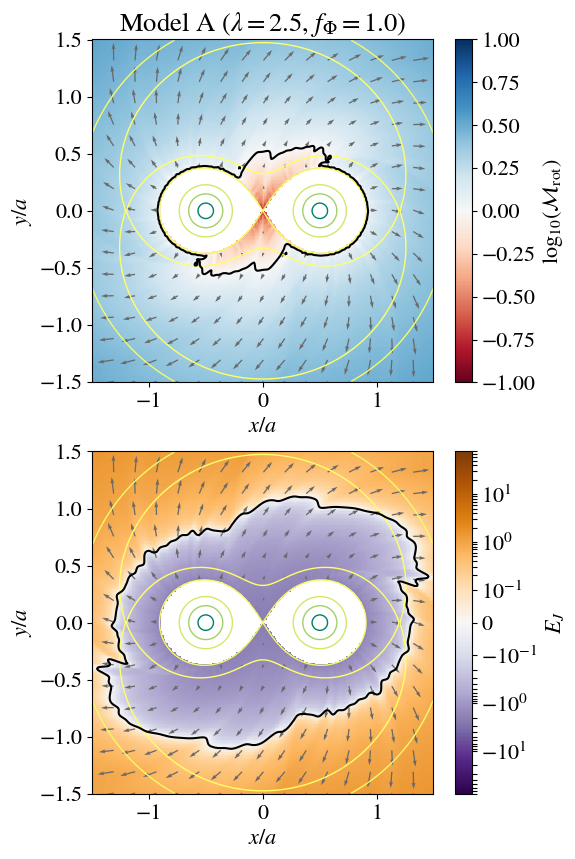

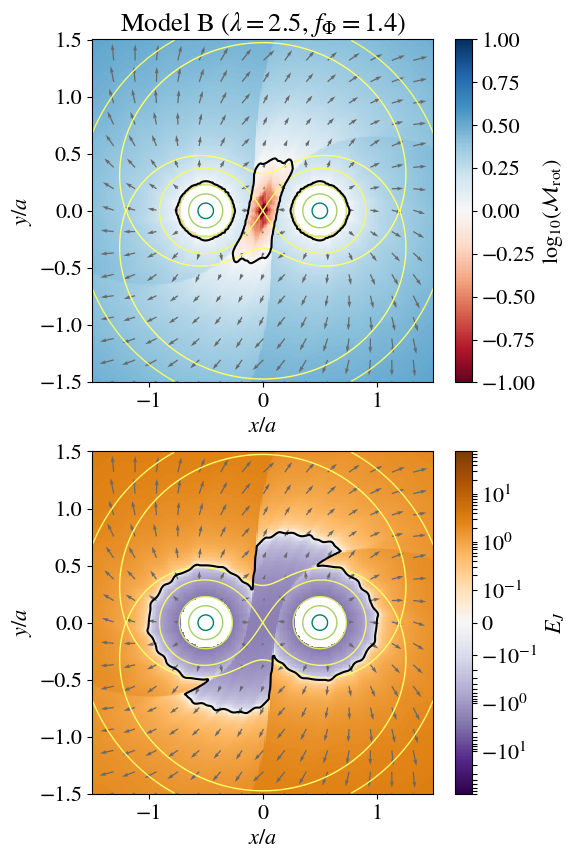

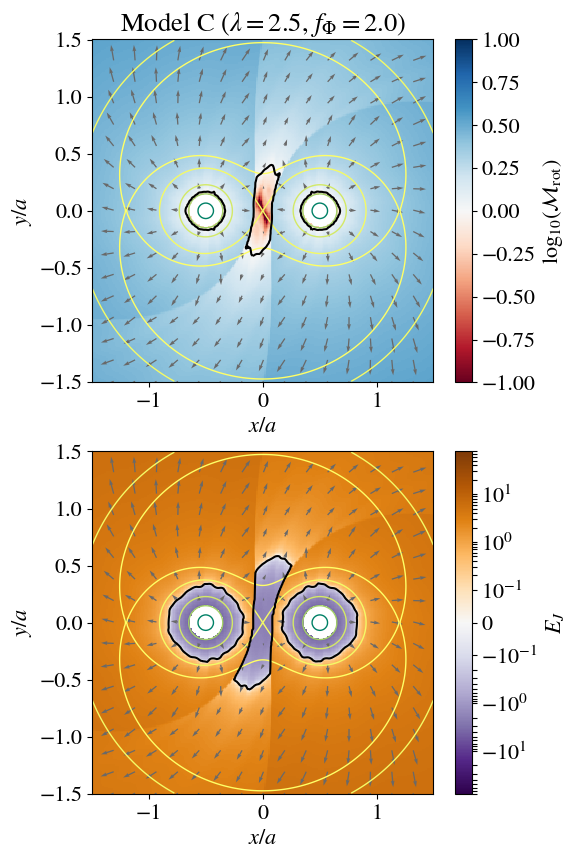

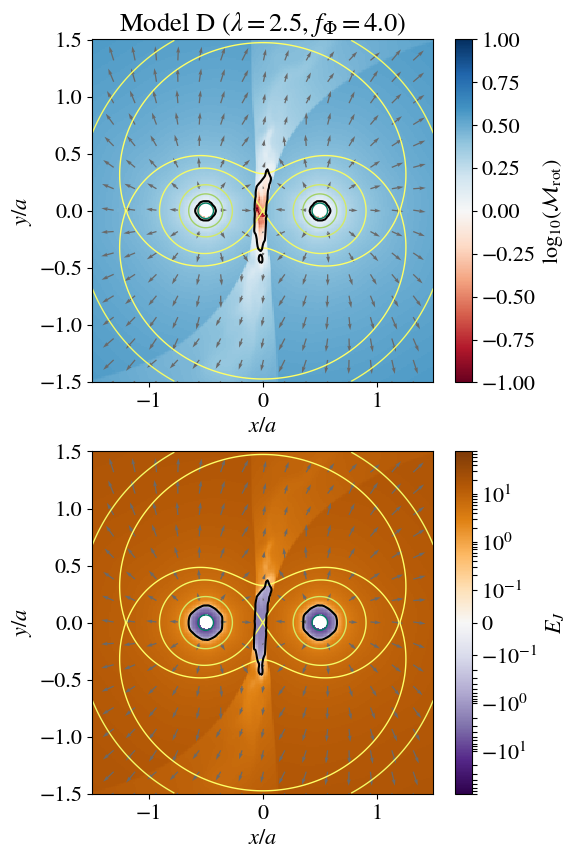

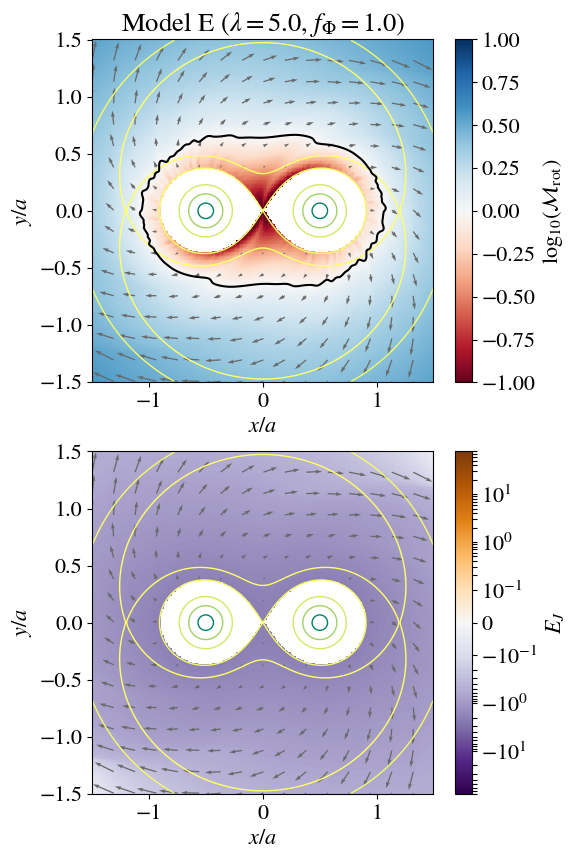

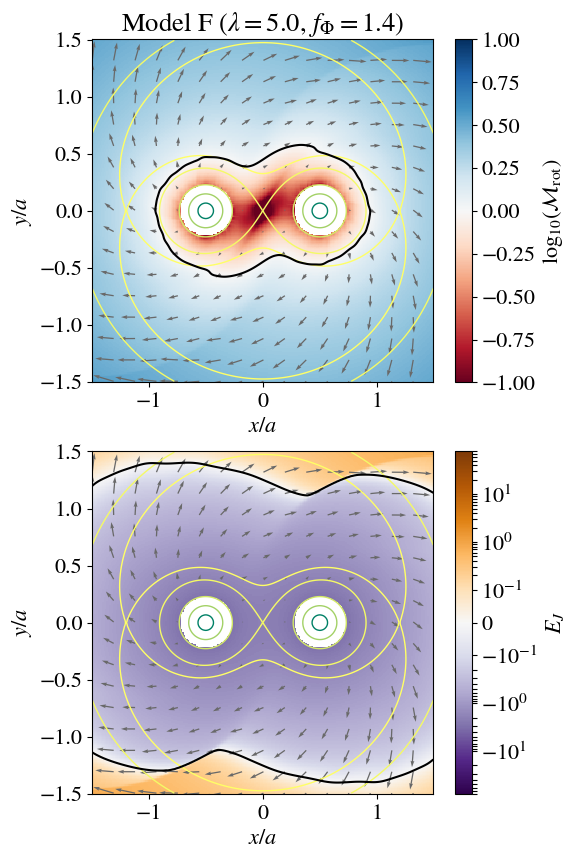

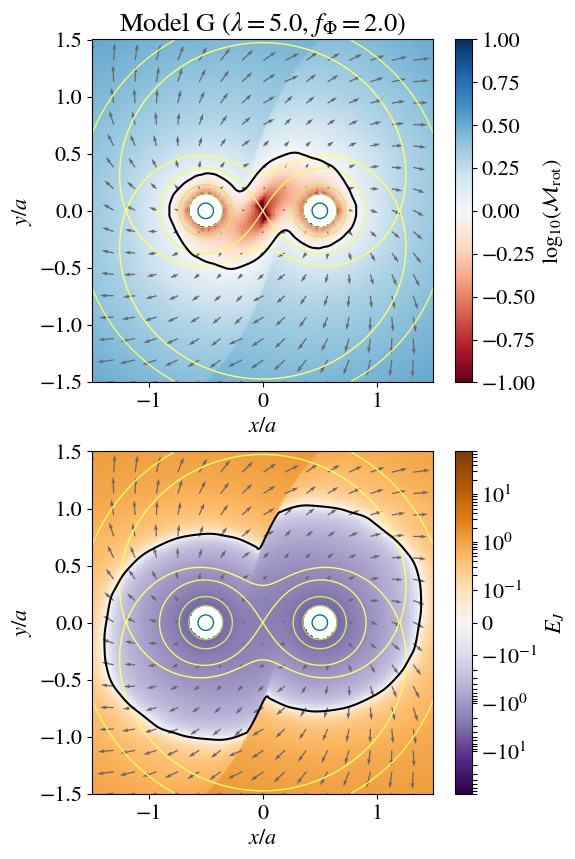

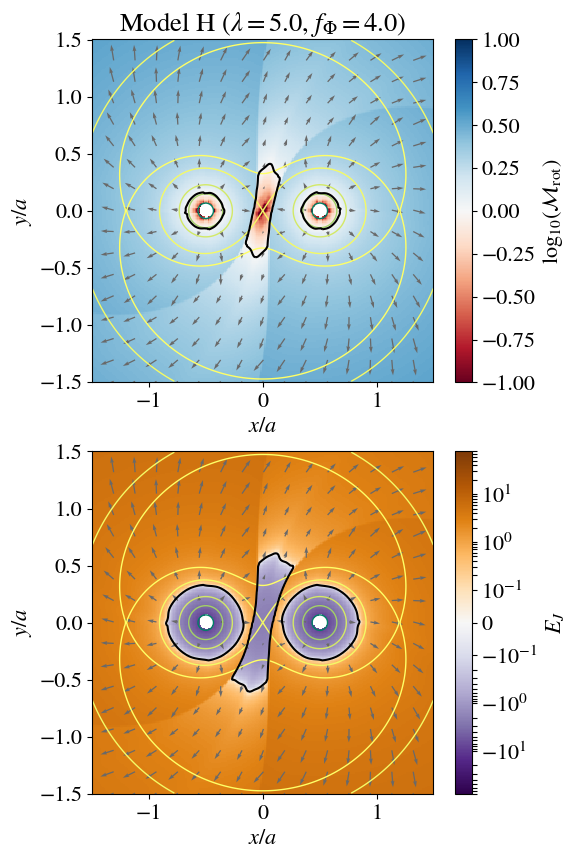

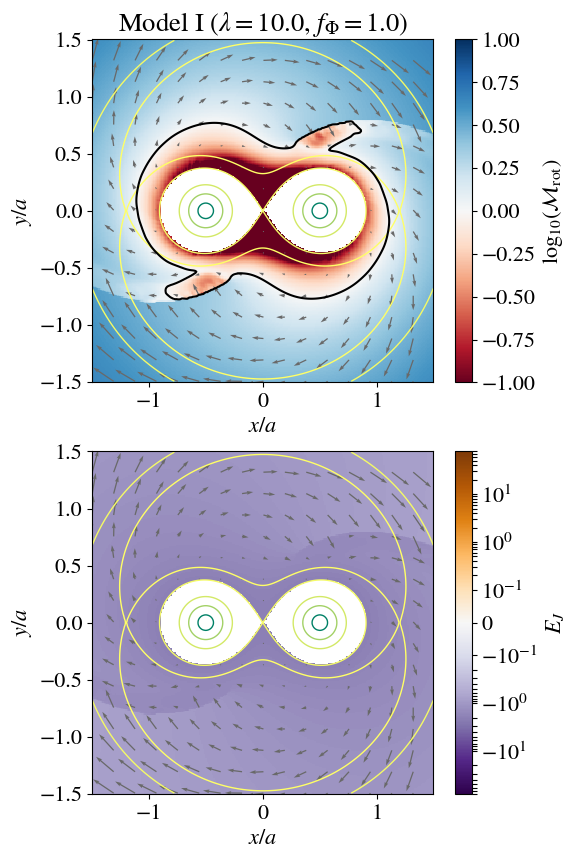

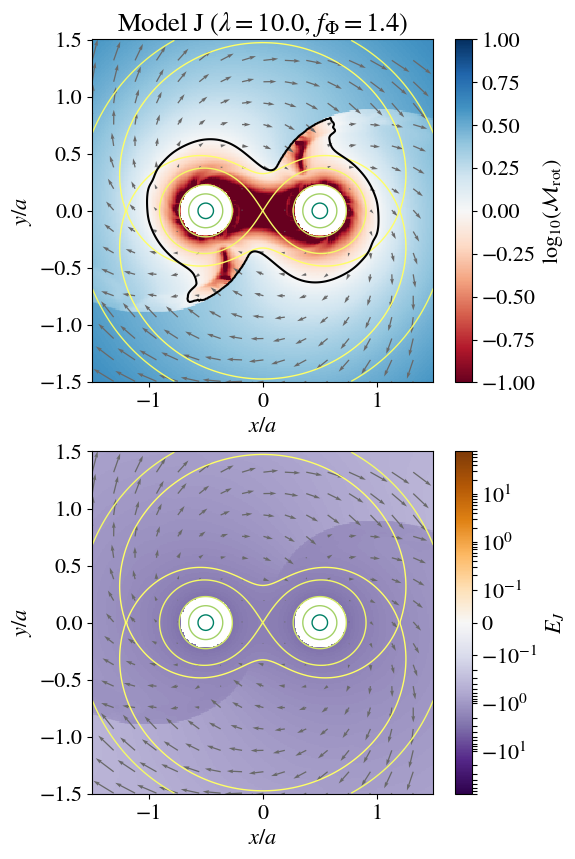

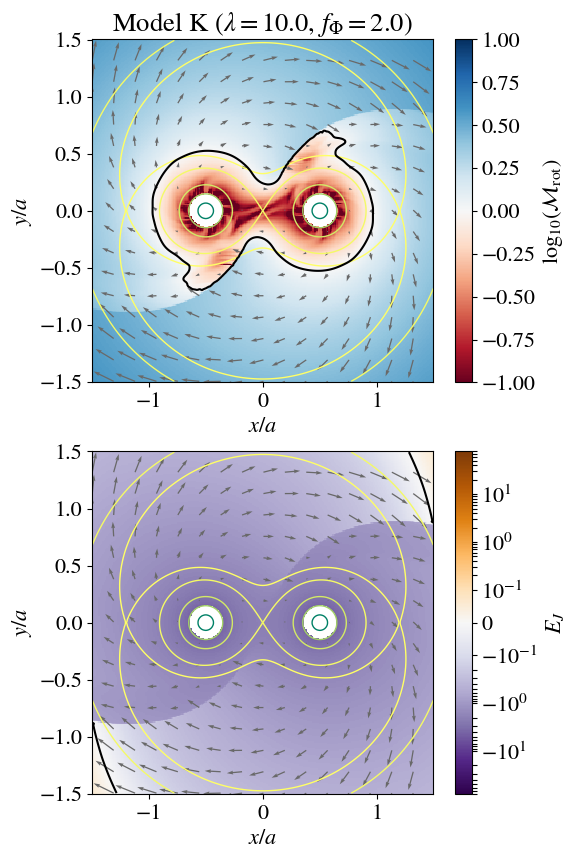

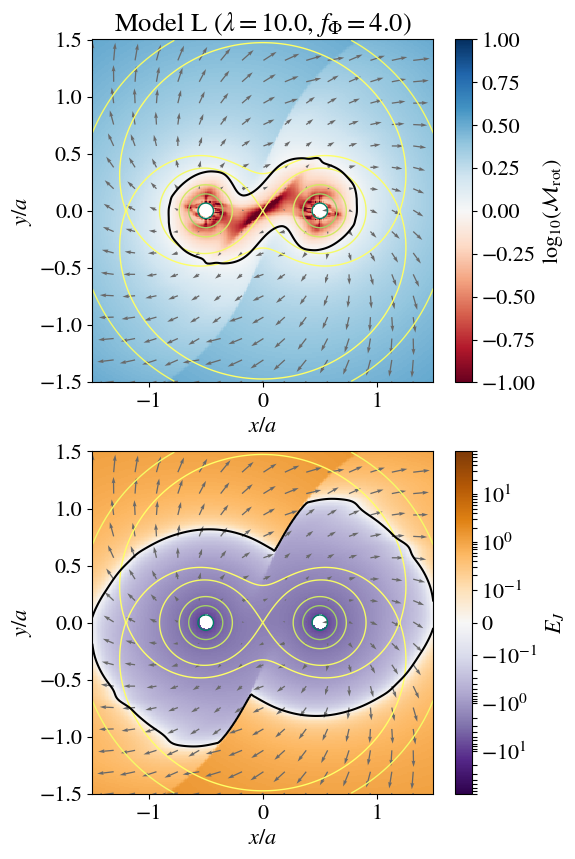

In [117]:
st = ascii.read("simtable_v_r5_p4_l2.dat")
rmax = [48,48,48,48, 48,48,48,48, 35,28,23,20]

for i,my_dir in enumerate(st['dir']):
    if(st['fphi'][i]!=4.0):
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00011.athdf"
    else:
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00010.athdf"
    print(fn)
    
    
    plt.figure(figsize=(5.5,10))


    # Dens panel 

    ## Read
    d = bw.read_data(fn,level=None,get_slice=True,slice_dir='z',slice_val=0,lim=1.5)
    fphi=st['fphi'][i]
    d['EJ'] = 0.5*(d['vel1']**2 + d['vel2']**2 + d['vel3']**2) + d['PhiEff']
    d['r'] = np.sqrt(d['x']**2 + d['y']**2 + d['z']**2)
    d['machrot'] = np.sqrt(d['vel1']**2 + d['vel2']**2+d['vel3']**2)/np.sqrt(1.01*d['press']/d['rho'])
    cond = ((d['PhiEff']<-2*fphi) & (d['r']<1.2)) | (d['r'] > rmax[i])

    # Make plot
    plt.subplot(211)

    subsample = 1

    plt.pcolormesh(d['x'][0,::subsample,::subsample],
                   d['y'][0,::subsample,::subsample], 
                   np.log10(np.ma.masked_where(cond,d['machrot'])[0,::subsample,::subsample] ),rasterized=True,
                   cmap='RdBu',
                   vmax=1,vmin=-1)
    plt.colorbar(label=r"$\log_{10}\left({\cal M}_{\rm rot} \right)$")

    skip = subsample*16
    plt.quiver( d['x'][0,::skip,::skip],
                d['y'][0,::skip,::skip],
                np.ma.masked_where(cond,d['vel1'])[0,::skip,::skip],
                np.ma.masked_where(cond,d['vel2'])[0,::skip,::skip],
                color='DimGray')

    plt.contour(d['x'][0,::subsample,::subsample],
                d['y'][0,::subsample,::subsample],
                d['PhiEff'][0,::subsample,::subsample],
                levels = [-2*4,-2*2,-2*np.sqrt(2),-2,-2*0.86424],
                linewidths=1,
                cmap='summer'
               )
    
    plt.contour(d['x'][0,::subsample,::subsample],
               d['y'][0,::subsample,::subsample], 
               np.log10(np.ma.masked_where(cond,d['machrot'])[0,::subsample,::subsample] ),
               levels=[0],colors='k')

    #plt.annotate('corotating frame',(0.05,0.05),xycoords='axes fraction',fontsize=12,
    #             backgroundcolor='AliceBlue',color='SteelBlue')

    plt.title("Model "+st['model'][i]+r" $(\lambda=$"+str(st['lambda'][i])+r", $f_\Phi=$"+str(np.round(st['fphi'][i],1))+")" )

    plt.axis('equal')
    plt.xlabel(r'$x/a$')
    plt.ylabel(r'$y/a$')


    ### EJ panel

    # Make plot
    plt.subplot(212)

    #subsample = 1

    plt.pcolormesh(d['x'][0,::subsample,::subsample],
                   d['y'][0,::subsample,::subsample], 
                   np.ma.masked_where(cond,d['EJ'])[0,::subsample,::subsample] ,rasterized=True,
                   cmap='PuOr_r',
                  norm = colors.SymLogNorm(linthresh=0.1,vmin=-80,vmax=80))
    plt.colorbar(label=r"$E_J$")

    plt.quiver( d['x'][0,::skip,::skip],
                d['y'][0,::skip,::skip],
                np.ma.masked_where(cond,d['vel1'])[0,::skip,::skip],
                np.ma.masked_where(cond,d['vel2'])[0,::skip,::skip],
                color='DimGray')

    plt.contour(d['x'][0,::subsample,::subsample],
                d['y'][0,::subsample,::subsample],
                d['PhiEff'][0,::subsample,::subsample],
                levels = [-2*4,-2*2,-2*np.sqrt(2),-2,-2*0.86424],
                linewidths=1,
                cmap='summer'
               )
    
    plt.contour(d['x'][0,::subsample,::subsample],
               d['y'][0,::subsample,::subsample], 
               np.ma.masked_where(cond,d['EJ'])[0,::subsample,::subsample] ,
               levels=[0],colors='k')


    plt.axis('equal')
    plt.xlabel(r'$x/a$')
    plt.ylabel(r'$y/a$')
    
    plt.savefig('figures/mach_EJ_'+str(i)+".pdf",bbox_inches='tight')

# Velocity

/Users/morganmacleod/DATA/athenaruns/binary-wind/gamma1/lam2.5/phi1.0/BINWIND.out1.00011.athdf
('retrieving data with level =', 1, ' within in limit=', 18)


KeyboardInterrupt: 

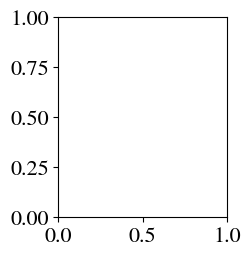

In [153]:
st = ascii.read("simtable_v_r5_p4.dat")

from scipy.optimize import root

def rootParker(V,roR=10):
    return V**2 - np.log(V**2) - 4.*np.log(roR) + 4./roR -3.

def rootBernoulli(v,r=10,Bern=0,K=1,mdot=1):
    gamma=1.01
    return 0.5*v**2 - 1.0/r + gamma/(gamma-1.)*K*(mdot/(4*np.pi*v* r**2))**(gamma-1.) - Bern


fig = plt.figure(figsize=(10,9))
nrows = 3
ncols = 4

for i,my_dir in enumerate(st['dir']):
    if(st['fphi'][i]!=4.0):
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00011.athdf"
    else:
        fn = root_dir_morgan + my_dir + "BINWIND.out1.00010.athdf"
    print(fn)
    
    plt.subplot(nrows,ncols,i+1)

    # READ FILE
    d = bw.read_data(fn,level=1,get_slice=False,lim=18)
    fphi=st['fphi'][i]

    
    dV=(d['x1v'][1]-d['x1v'][0])**3
    d['r'] = np.sqrt(d['x']**2 + d['y']**2 + d['z']**2)
    d['vr'] =  d['vx']*d['x']/d['r'] + d['vy']*d['y']/d['r'] + + d['vz']*d['z']/d['r']
    sel = d['r']<18
    im=plt.hist2d(np.log10(d['r'][sel]), 
           np.log10(d['vr'][sel]),
              weights=d['rho'][sel]*dV,
              norm=colors.LogNorm(vmin=1.e-3,vmax=1.e2),
              cmap='GnBu',bins=80,range=[[0,np.log10(18)],[-0.8,1.1]],
              normed=True,rasterized=True)
    
    
    #plt.xlim(0,18)
    #plt.ylim(0.1,13)
    
    
    plt.grid(ls=":",color='grey',zorder=0)
    
    xp = np.linspace(2.5,18,30)
    vp = root(rootBernoulli,3*np.ones_like(xp),args=(xp,st['BernRot0'][i],st['p_surf'][i],-st['mdot'][i])).x

    plt.plot(np.log10(xp),np.log10(vp),'--',color='RosyBrown',label='Bernoulli wind')
    
    if(i==0):
        plt.legend(frameon=True)
    
    if(i<4):
        plt.title(r"$f_\Phi=$"+str(np.round(st['fphi'][i],2)),fontsize=16 )
        
    if( (i%4)!=0 ):
        plt.yticks(visible=False)
        
    if(i<8):
        plt.xticks(visible=False)

    if(i>7):
        plt.xlabel(r'$\log_{10}\left(r/a\right)$')
    
    if( (i%4)==0 ):
        plt.ylabel(r'$\lambda=$'+str(st['lambda'][i])+'\n'+r'$\log_{10}\left(v_r/v_{\rm orb}\right)$')
    
    plt.annotate(st['model'][i],(0.9,0.05),xycoords='axes fraction',
             backgroundcolor='Cornsilk',color='Sienna',fontsize=12)
    
    
    
cb_ax = fig.add_axes([0.25, 0.9, 0.5, 0.01])
cbar = fig.colorbar(im[3], cax=cb_ax,extend='both',
                    orientation='horizontal',label='probability density (normalized)')
plt.subplots_adjust(hspace=0,wspace=0,top=0.79)
    
plt.savefig("figures/vr_hist_all.pdf",bbox_inches="tight")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in power


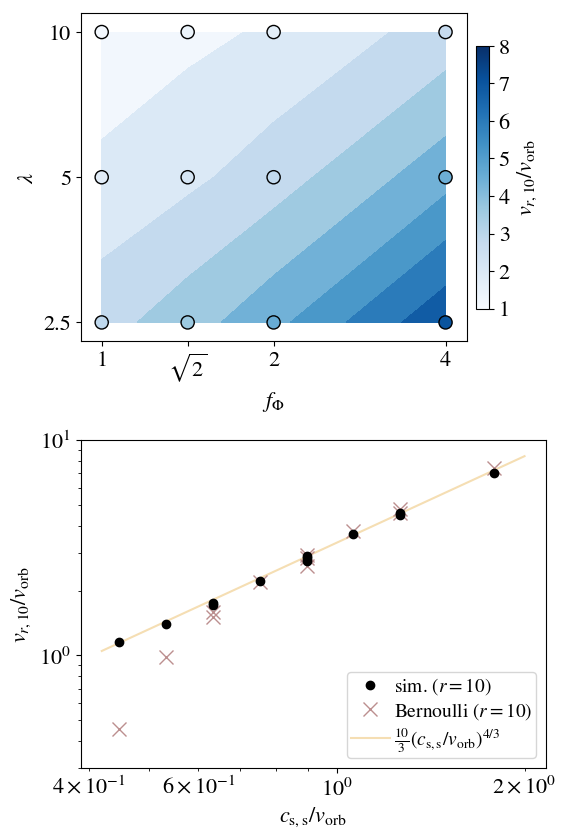

In [17]:
st = ascii.read("simtable_v_r5_p4_l2.dat")


fphi=np.array(st['fphi']).reshape(3,4)
lam=np.array(st['lambda']).reshape(3,4)
vr10=np.array(st['v10']).reshape(3,4)


plt.figure(figsize=(6,10))

plt.subplot(211)
mycm = 'Blues'
vmin=1
vmax=8
plt.contourf(np.log10(fphi),np.log10(lam),vr10,vmin=vmin,vmax=vmax,cmap=mycm)

plt.scatter(np.log10(st['fphi']),
            np.log10(st['lambda']),c=st['v10'] ,
            vmin=vmin,vmax=vmax,
            edgecolor='k',
            s=90,
           cmap=mycm)
plt.colorbar(label=r"$v_{r,10}/v_{\rm orb}$",shrink=0.8,pad=0.02)

plt.xticks(np.log10([1,np.sqrt(2),2,4]),['1','$\sqrt{2}$','2','4'])
plt.yticks(np.log10([2.5,5,10]),[2.5,5,10] )
plt.xlabel(r"$f_\Phi$")
plt.ylabel(r"$\lambda$")


plt.subplot(212)
def rootBernoulli(v,r=10,Bern=0,K=1,mdot=1):
    gamma=1.01
    return 0.5*v**2 - 1.0/r + gamma/(gamma-1.)*K*(mdot/(4*np.pi*v* r**2))**(gamma-1.) - Bern

vp10 = root(rootBernoulli,3*np.ones_like(st['BernRot0']),
          args=(10,st['BernRot0'],st['p_surf'],-st['mdot'])).x

vpL2 = root(rootBernoulli,3*np.ones_like(st['BernRot0']),
          args=(1.35,st['BernRot0'],st['p_surf'],-st['mdot'])).x




plt.plot(st['cs_surf'],st['v10'],'ko',label='sim. $(r=10)$')
plt.plot(st['cs_surf'],vp10,'x',color='RosyBrown',label='Bernoulli $(r=10)$',markersize=10,zorder=1)


xp = np.linspace(0.42,2,30)
plt.plot(xp,10/3.*xp**(4/3.) ,color='Wheat',zorder=0,label=r'$\frac{10}{3} \left(c_{\rm s,s}/v_{\rm orb}\right)^{4/3} $')


plt.legend(loc='lower right',frameon=True)
plt.xlabel(r"$c_{\rm s,s}/v_{\rm orb}$")
plt.ylabel(r"$v_{r,10}/v_{\rm orb}$")
plt.loglog()
plt.ylim(0.3,10)

plt.subplots_adjust(hspace=0.3)

plt.savefig('figures/v10.pdf',bbox_inches='tight')


# Mdot

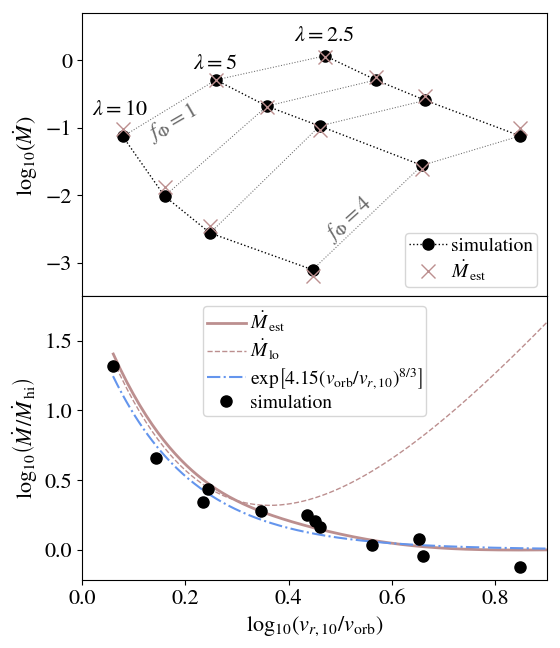

In [18]:
st = ascii.read("simtable_v_r5_p4.dat")

from astropy.modeling import models, fitting

rho_sonic = np.exp(1.5-st['lambda'])
st['mdot_est_1'] = -0.25*np.pi*st['cs_surf']**-3 * rho_sonic 
st['mdot_est_2'] = - np.pi*st['cs_surf']**3/np.sqrt(np.e)*np.exp(-2*(st['fphi']-0.86424)/st['cs_surf']**2)
Pl2 = -2*0.86424
a = 1
b = 2
st['mdot_est_bin'] = -( ( (np.pi/(2*st['cs_surf']**3))**-a + (2*np.pi*st['cs_surf']**3)**-a )**(-1./a)  
                      * np.exp(-st['lambda'] + ((-Pl2/st['cs_surf']**2 - 0.5)**b + 1.5**b)**(1./b)  )   )


plt.figure(figsize=(6,7.5))

## UNNORMALIZED
plt.subplot(211)

for fp in np.unique(st['fphi']): 
    sel = st['fphi']==fp
    plt.plot(np.log10(st[sel]['v10']),np.log10(-st[sel]['mdot']),':',
             label='',color='DimGrey',lw=0.75)

labels = ['simulation','','']
for i,ll in enumerate(np.unique(st['lambda'])):
    sel = st['lambda']==ll
    plt.plot(np.log10(st[sel]['v10']),np.log10(-st[sel]['mdot']),'ko:',
             label=labels[i],lw=0.99,markersize=8)

plt.plot(np.log10(st['v10']),np.log10(-st['mdot_est_bin']),'x',
         markersize=10,color='RosyBrown',label=r'$\dot M_{\rm est}$',lw=2)

plt.ylabel(r'$\log_{10}\left(\dot M\right)$')
plt.xlim(-0.02,0.9)
plt.ylim(-3.5,0.7)
plt.xticks(visible=False)
plt.legend(frameon=True,loc='lower right')
#plt.grid()
plt.annotate(r'$\lambda=10$',(0,-0.8))
plt.annotate(r'$\lambda=5$',(0.2,-0.12))
plt.annotate(r'$\lambda=2.5$',(0.4,0.29))
plt.annotate(r'$f_\Phi=1$',(0.1,-0.82),rotation=30,color='DimGrey')
plt.annotate(r'$f_\Phi=4$',(0.45,-2.19),rotation=42,color='DimGrey')



## NORMALIZED
plt.subplot(212)

xp = np.linspace(0.45,2,300)
me_mh = np.exp(  np.sqrt((-Pl2/xp**2 - 0.5)**2 + 1.5**2) - 1.5  )/(1+(4.*xp**6)**-1 )
plt.plot(np.log10(10/3.*xp**(4/3.) ) ,np.log10(me_mh) ,label=r'$\dot M_{\rm est}$',
        color='RosyBrown',lw=2)
plt.plot(np.log10(10/3.*xp**(4/3.)),np.log10(4*xp**6*np.exp(-2-Pl2/xp**2) ) ,'--',
        color='RosyBrown',lw=1,label=r'$\dot M_{\rm lo}$')


Pl2 = -2*0.86424
vp = np.logspace(0.06,0.9,300)
plt.plot(np.log10(vp),np.log10( np.exp( 4.15*(1/vp)**(8./3.) ) ),'-.',
         label=r"$\exp\left[ 4.15 \left( v_{\rm orb} / v_{r,10}\right)^{8/3} \right]$",
         color='CornflowerBlue')


plt.plot(np.log10(st['v10']),np.log10(st['mdot']/(2*st['mdot_est_1'])) ,'ko',
        label='simulation',lw=0.99,markersize=8)

plt.ylabel(r'$\log_{10}\left(\dot M / \dot M_{\rm hi}\right)$')
plt.xlabel(r"$\log_{10} \left(v_{r,10}/v_{\rm orb}\right)$")
plt.legend(frameon=True)
plt.xlim(0,0.9)
#plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig('figures/mdot.pdf',bbox_inches='tight')


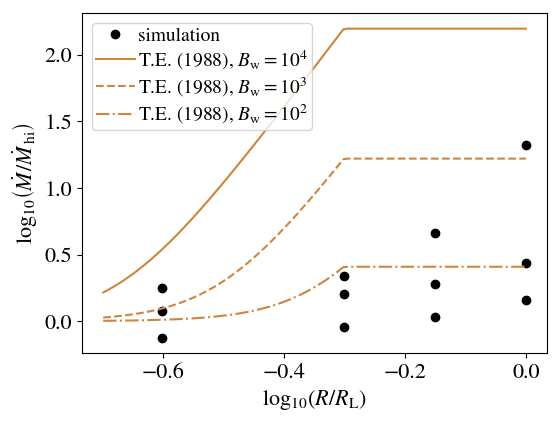

In [19]:
# Comparison to Tout & Eggleton (1988)
plt.figure(figsize=(6,4.5))

myc = 'Peru'

def enhance_fac(R_o_RL,Bw=1e4):
    rfac = np.where(R_o_RL<0.5,R_o_RL,0.5)
    return (1. + Bw*rfac**6)
    

plt.plot(np.log10(1./st['fphi']),np.log10(st['mdot']/(2*st['mdot_est_1'])) ,'ko',label='simulation')

xp = np.linspace(0.2,1,100)
plt.plot(np.log10(xp),np.log10(enhance_fac(xp,Bw=1e4)) ,'-',label=r'T.E. (1988), $B_{\rm w} = 10^4$',c=myc )
plt.plot(np.log10(xp),np.log10(enhance_fac(xp,Bw=1e3)) ,'--',label=r'T.E. (1988), $B_{\rm w} = 10^3$',c=myc )
plt.plot(np.log10(xp),np.log10(enhance_fac(xp,Bw=1e2)) ,'-.',label=r'T.E. (1988), $B_{\rm w} = 10^2$',c=myc )

plt.xlabel(r'$\log_{10}\left( R / R_{\rm L} \right)$')
plt.ylabel(r'$\log_{10}\left(\dot M / \dot M_{\rm hi}\right)$')
plt.legend(frameon=True)
plt.savefig('figures/mdot_tide.pdf',bbox_inches='tight')

# Ldot

In [20]:
bt = Table()
bt['V'] = [2.,3,5,10,30,100,300]
bt['hcm'] = [3.3051,1.9898,0.70936,0.69573,0.69541,0.69552,0.69555]
bt['vwind'] = bt['V']/2.
bt['v10'] = np.sqrt(bt['vwind']**2 -1.9)
bt['gamma_loss'] = bt['hcm']*2.

print bt

  V     hcm   vwind        v10         gamma_loss
----- ------- ----- ------------------ ----------
  2.0  3.3051   1.0                nan     6.6102
  3.0  1.9898   1.5 0.5916079783099617     3.9796
  5.0 0.70936   2.5  2.085665361461421    1.41872
 10.0 0.69573   5.0  4.806245936279167    1.39146
 30.0 0.69541  15.0 14.936532395439043    1.39082
100.0 0.69552  50.0 49.980996388627545    1.39104
300.0 0.69555 150.0 149.99366653295732     1.3911


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


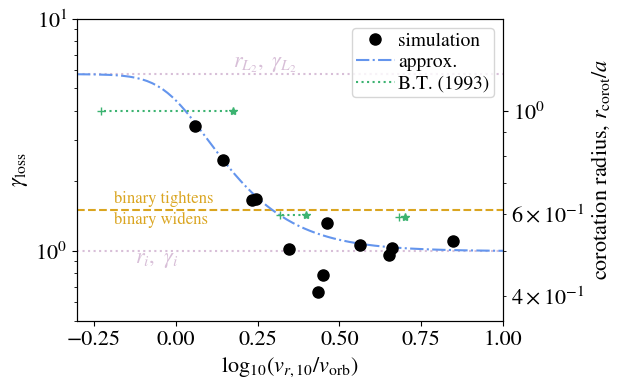

In [21]:
gmin = 0.5
gmax = 10


def rcorot_model(vw):
    xi = 0.5
    xl2 = 1.2
    rv = 1./vw**2
    a = 1.5
    b = 5.
    return (xl2**-b + (rv**a + xi**a)**(-b/a) )**(-1./b)



fig,ax1 = plt.subplots(figsize=(5.5,4))

#plt.plot(xp, rcorot_model(xp)**2 / 0.25,'-',color='r' )
plt.yscale("log")
plt.ylim(gmin,gmax)
plt.ylabel(r'$\gamma_{\rm loss}$')
plt.xlim(np.log10(0.5),1)
plt.xlabel(r"$\log_{10} \left(v_{r,10}/v_{\rm orb}\right)$")

plt.axhline(1.5,color='GoldenRod',ls='--')
plt.annotate('binary widens',(np.log10(0.65),1.31),color='GoldenRod',fontsize=12)
plt.annotate('binary tightens',(np.log10(0.65),1.6),color='GoldenRod',fontsize=12)


ax2 = ax1.twinx()
plt.axhline(0.5,zorder=0,ls=":",color="Thistle")
plt.axhline(1.2,zorder=0,ls=":",color="Thistle")
plt.annotate(r"$r_{L_2}, \ \gamma_{L_2}$",(np.log10(1.5),1.24),color='Thistle')
plt.annotate(r"$r_i, \ \gamma_i$",(np.log10(0.75),0.47),color='Thistle')

plt.plot(np.log10(st['v10']),0.5*np.sqrt(st['gamma_loss']),'ko',label='simulation',markersize=8)

xp = np.linspace(0.5,10,300)
plt.plot(np.log10(xp), rcorot_model(xp),'-.',color='CornflowerBlue' ,zorder=0,label='approx.')


btc = 'MediumSeaGreen'
for V in [3,5,10]:
    sel = bt['V']==V
    if(V==3):
        mylabel='B.T. (1993)'
    else:
        mylabel=''
    plt.plot([np.log10(bt[sel]['vwind']),np.log10(bt[sel]['v10'])], [0.5*np.sqrt(bt[sel]['gamma_loss']),0.5*np.sqrt(bt[sel]['gamma_loss'])],':',label=mylabel,color=btc)
    plt.plot(np.log10(bt[sel]['v10']),0.5*np.sqrt(bt[sel]['gamma_loss']),'+',color=btc,label='')
    plt.plot(np.log10(bt[sel]['vwind']),0.5*np.sqrt(bt[sel]['gamma_loss']),'*',color=btc,label='')



plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'corotation radius, $r_{\rm corot}/a$')
plt.ylim(0.5*np.sqrt(gmin),0.5*np.sqrt(gmax))

plt.legend(frameon=True,loc='upper right')


plt.savefig("figures/gv.pdf",bbox_inches='tight')

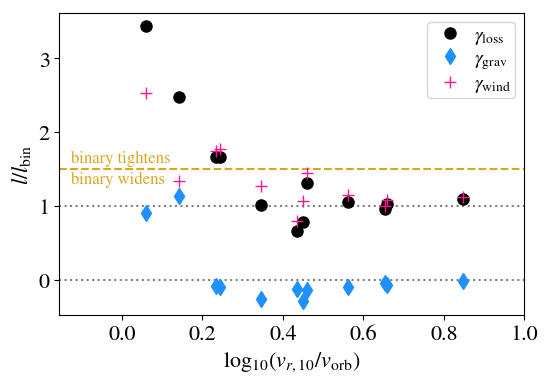

In [23]:
plt.figure(figsize=(6,4))

plt.axhline(1.5,color='GoldenRod',ls='--')
plt.annotate('binary widens',(np.log10(0.75),1.31),color='GoldenRod',fontsize=12)
plt.annotate('binary tightens',(np.log10(0.75),1.6),color='GoldenRod',fontsize=12)


plt.plot(np.log10(st['v10']),st['gamma_loss'],'ko',markersize=8,label=r'$\gamma_{\rm loss}$')
plt.plot(np.log10(st['v10']),st['gamma_grav'],'d',markersize=8,color='DodgerBlue',label=r'$\gamma_{\rm grav}$')
plt.plot(np.log10(st['v10']),st['gamma_wind'],'k+',markersize=8,color='DeepPink',label=r'$\gamma_{\rm wind}$')
#plt.xscale('log')
plt.legend(loc=0,frameon=True)
plt.ylabel(r'$l/l_{\rm bin}$')
plt.xlabel(r"$\log_{10} \left(v_{r,10}/v_{\rm orb}\right)$")
plt.xlim(np.log10(0.7),1)
plt.axhline(0,color='grey',ls=":",zorder=0)
plt.axhline(1,color='grey',ls=":",zorder=0)

plt.savefig('figures/gamma_comp.pdf',bbox_inches='tight')

# Binary Evolution

In [25]:
from scipy.integrate import solve_ivp


def gloss(vw_o_vorb):
    return rcorot_model(vw_o_vorb)**2/0.25

def mdot_enhance(vw_o_vorb):
    return np.exp( 4.15*vw_o_vorb**(-8./3.) )



def derivs(t,vec,vw=1.0,mdhi=1.0,Ggrav=1.0):
    a,m = vec
    vorb = np.sqrt(Ggrav*m/a)
    vw_o_vorb = vw / vorb
    
    dmdt = mdot_enhance(vw_o_vorb) * mdhi
    dadt = (2.*gloss(vw_o_vorb) - 3.)*(dmdt/m)*a
    
    return np.array([dadt,dmdt])


def integrate(m0 = 1,a0 = 1,vw0 = 1.5,mdhi = -1,Ggrav = 1,tmax=1):
    ic = np.array([m0,a0])
    times = np.linspace(0,tmax,1000)

    ivp = solve_ivp(fun=lambda t, y: derivs(t, y,vw0,mdhi,Ggrav),
                t_span=(times[0],times[-1]),
                y0=ic,
                t_eval=times)


    print ("---- integration ---------------")
    print ("solver message: ",ivp.message)
    print ("--------------------------------")

    solT = Table(data=ivp.y.T,names=['a','M'])
    solT['t'] = ivp.t
    
    return solT

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


---- integration ---------------
('solver message: ', 'Required step size is less than spacing between numbers.')
--------------------------------
---- integration ---------------
('solver message: ', 'Required step size is less than spacing between numbers.')
--------------------------------
---- integration ---------------
('solver message: ', 'The solver successfully reached the interval end.')
--------------------------------
---- integration ---------------
('solver message: ', 'The solver successfully reached the interval end.')
--------------------------------
---- integration ---------------
('solver message: ', 'The solver successfully reached the interval end.')
--------------------------------
---- integration ---------------
('solver message: ', 'The solver successfully reached the interval end.')
--------------------------------
---- integration ---------------
('solver message: ', 'The solver successfully reached the interval end.')
--------------------------------


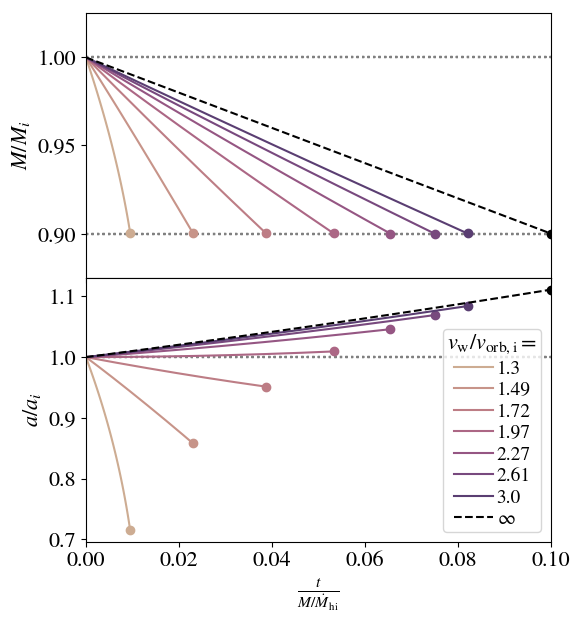

In [92]:
plt.figure(figsize=(6,7))
nv = 7
#vl = np.linspace(1.3,3,nv)
vl = np.logspace(np.log10(1.3),np.log10(3),nv)
mypal =  sns.cubehelix_palette(nv,rot=0.8,start=-0.5,dark=0.3,light=0.7)
#sns.palplot( mypal )

for i,myv in enumerate(vl):
    solT = integrate(m0=1,a0=1,vw0=myv,mdhi=-1,Ggrav=1,tmax=0.1)
    solT['vw'] = myv
    solT['vorb'] = np.sqrt(solT['M']/solT['a'])
    #plt.plot(solT['M'],solT['a'],label='M/M_0',color=mypal[i])
    sel = solT['M']>0.9*solT['M'][0]
    
    
    plt.subplot(211)
    plt.axhline(1,color='grey',ls=":",zorder=0)
    plt.axhline(0.9,color='grey',ls=":",zorder=0)
    plt.plot(solT[sel]['t'],solT[sel]['M'],label=np.round(vl[i],2),color=mypal[i],lw=1.5)
    plt.plot(solT[sel]['t'][-1],solT[sel]['M'][-1],"o",label='',color=mypal[i])
    plt.xticks(visible=False)
    plt.ylabel(r'$M/M_i$')
    plt.xlim(0,0.1)
    plt.ylim(0.875,1.025)
    
    plt.subplot(212)
    plt.axhline(1,color='grey',ls=":",zorder=0)
    plt.plot(solT[sel]['t'],solT[sel]['a'],label=np.round(vl[i],2),color=mypal[i],lw=1.5)
    plt.plot(solT[sel]['t'][-1],solT[sel]['a'][-1],"o",label="",color=mypal[i])
    plt.ylabel(r'$a/a_i$')
    plt.xlim(0,0.1)
    
plt.xlabel(r'$\frac{t}{M/\dot M_{\rm hi}}$')
plt.subplots_adjust(hspace=0)

plt.subplot(211)
xp = np.linspace(0,0.1,100)
plt.plot(xp,1-xp,'k--')
plt.plot(0.1,0.9,'ko')
plt.subplot(212)
plt.plot(xp,1./(1.-xp),'k--',label=r'$\infty$')
plt.plot(0.1,1./0.9,'ko')

plt.legend(loc='lower right',frameon=True,title=r'$v_{\rm w}/v_{\rm orb,i}=$')
plt.savefig("figures/bin_t.pdf",bbox_inches='tight')